![planets](https://exoplanets.nasa.gov/internal_resources/1806)
____
## Wed ICA
____

The goal of today's ICA is to become familiar with some of the tools for dealing with missingness in a dataset. The dataset you will use is the planets dataset, which is easily obtained from Seaborn. 

👉🏻 Your first task is to read the next few cells, where I will get you started. 

Let's first get the dataset and look at what it contains. Do you see any possible issues with missingness? 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset("planets")
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


As I mentioned in the lecture, it is good EDA practice to visualize the missing data in the dataset. Discuss some of the topics below with your group, and perhaps invent some ideas of your own. 

In particular, discuss with your group possible missingness issues. That is, it is clear there is missing data, but what do you think about its missingness? As a reminder: is the data missing in a given column random, or is it grouped? For those columns that are grouped, how are they grouped - is there a pattern? Or, is the missing data in one column correlated with values in another colulmn or missing data in another column? 

👉🏻 Summarize your discussions in a markdown cell. 

✅Answer:

*If we found many missing values with a pattern, then there may be a reason why they are missing, such as "Iceland people don't use last name" this kind of thing when you record their names but last name are mostly missing.*

<AxesSubplot:>

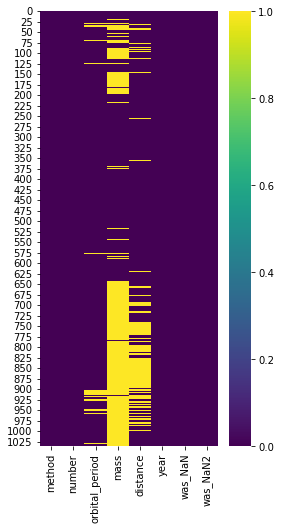

In [11]:
#plt.figure(figsize=(20,4))
plt.figure(figsize=(4,8))
#sns.heatmap(df.isna().transpose(), cmap="plasma")
sns.heatmap(df.isna(), cmap="viridis")
#sns.heatmap(df.isna(), cmap="magma")

Next, we'll make a base heatmap of the correlations and a pairplot. What does Python do with the missing values when we do this? 

👉🏻 Can you find documentation online that tell you what these tools do with missing values? If you can find it, what rule does it use? Could this cause a problem with interpretation? Are these visualizations misleading? 

✅Answer:

I didn't find documents but there are some disscusion between python users I found on the web.

"https://stackoverflow.com/questions/31493446/seaborn-pairplot-and-nan-values"

* When we use boolean method in heatmap, it shows the position where data point is missing.
* Pairplot command will show error if there is NA in the dataset. We need to dropna first.

<AxesSubplot:>

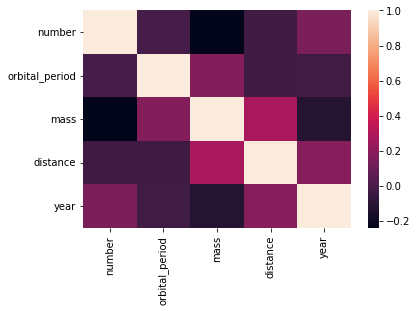

In [15]:
sns.heatmap(df.corr())

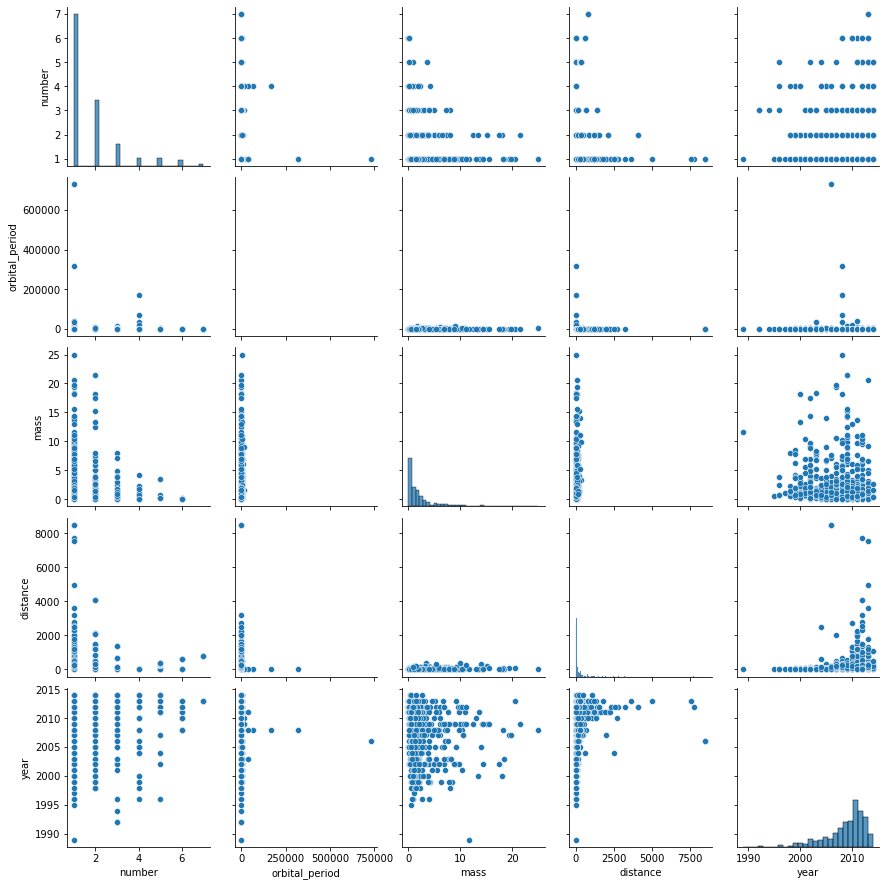

In [16]:
sns.pairplot(df)

Next, we are going to try to give a bit of an answer to the above question by making a new column in the dataframe that we can use to color code by a column having missing data (or not). 

👉🏻 Discuss the following code with your group members, and create a markdown cell where you explain what each line of code is doing. In the pairplot, why are there no orange points in the row and column with the mass variable? Does the pairplot give you additional insights into missingness? 

Try columns other than "mass". 


In [6]:
df["was_NaN"] = False
df.loc[df["mass"].isnull() == True, "was_NaN"] = True
df.head(8)

,method,number,orbital_period,mass,distance,year,was_NaN
0,Radial Velocity,1,269.300,7.10,77.40,2006,False
1,Radial Velocity,1,874.774,2.21,56.95,2008,False
2,Radial Velocity,1,763.000,2.60,19.84,2011,False
3,Radial Velocity,1,326.030,19.40,110.62,2007,False
4,Radial Velocity,1,516.220,10.50,119.47,2009,False
5,Radial Velocity,1,185.840,4.80,76.39,2008,False
6,Radial Velocity,1,1773.400,4.64,18.15,2002,False
7,Radial Velocity,1,798.500,NaN,21.41,1996,True


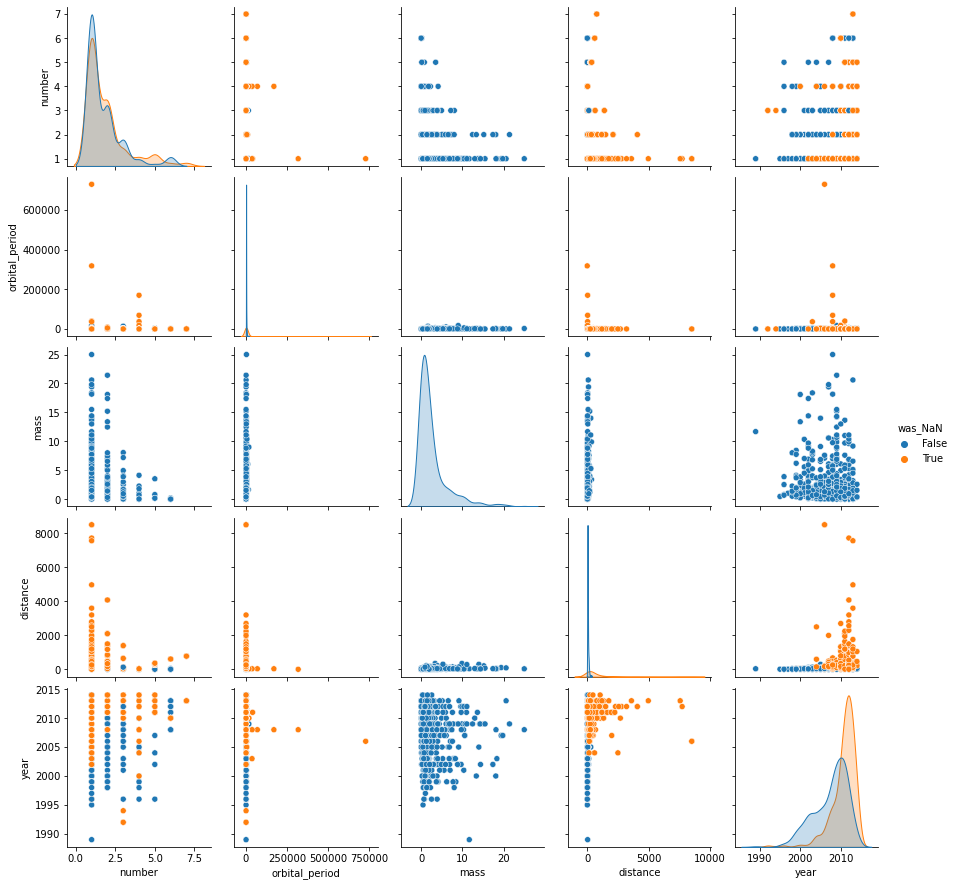

In [7]:
sns.pairplot(df, hue="was_NaN")

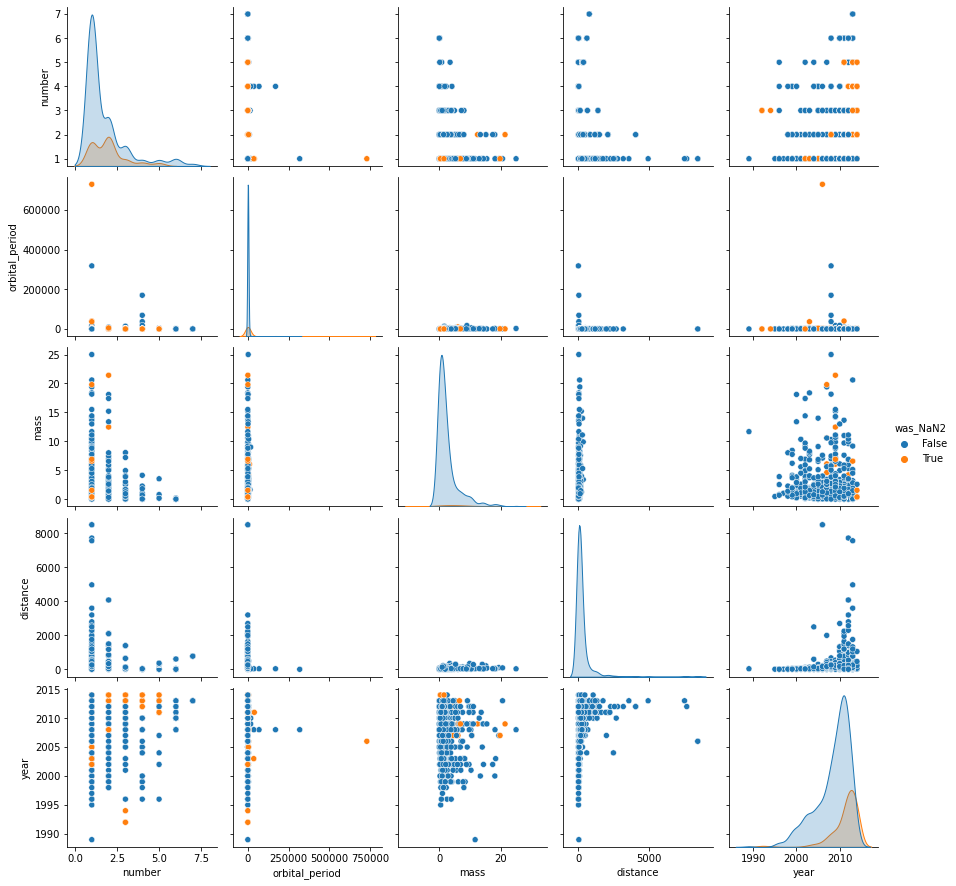

In [17]:
df["was_NaN2"] = False
df.loc[df["distance"].isnull() == True, "was_NaN2"] = True
df.head(8)
sns.pairplot(df, hue="was_NaN2")

✅Answer:

* The code first created a new column and set every value of to "False".
* Then it use mask to find which column has a missing mass, if there is, then set the value of the new column of that row to "True".
* Lastly, it plot the points out, the "hue" is wether the mass is missing.
* The reason why "mass" related plots doesn't have orange point is, orange point means the row has a missing mass, if there isn't a mass value then we cannot plot it out, thus the column and rows in the plot with mass variable doesn't have orange points.
* The new pairplot where we set "distance" as hue proved our guess, as in the rows and columns with "distance" variable now doesn't contain any orange points.

👉🏻 Discuss this code with your group. What does it do? In particular, are there issues with `sklearn` libraries preferring to use `numpy` arrays rather than `pandas` dataframes? 

In [99]:
df = sns.load_dataset("planets")

In [108]:
from sklearn.impute import SimpleImputer
my_imp = SimpleImputer(missing_values=np.NaN)
fixed_df = pd.DataFrame(my_imp.fit_transform(df.drop(columns="method")))
fixed_df["method"] = df["method"]
fixed_df.columns = ['number', 'orbital_period', 'mass', 'distance', 'year', 'method']
fixed_df.index = df.index
fixed_df

,number,orbital_period,mass,distance,year,method
0,1.0,269.300000,7.100000,77.40,2006.0,Radial Velocity
1,1.0,874.774000,2.210000,56.95,2008.0,Radial Velocity
2,1.0,763.000000,2.600000,19.84,2011.0,Radial Velocity
3,1.0,326.030000,19.400000,110.62,2007.0,Radial Velocity
4,1.0,516.220000,10.500000,119.47,2009.0,Radial Velocity
...,...,...,...,...,...,...
1030,1.0,3.941507,2.638161,172.00,2006.0,Transit
1031,1.0,2.615864,2.638161,148.00,2007.0,Transit
1032,1.0,3.191524,2.638161,174.00,2007.0,Transit
1033,1.0,4.125083,2.638161,293.00,2008.0,Transit


✅Answer:

* First it imported sklearn
* Second line is just an default setting .
* Then the code transform the df after dropping the "method" column, because numpy array can only deal with one data type, in this case "method" is not float so we drop it
* Then it adds the "method" column back
* Then it set the index and column names as the original one

Next, you are on your own to explore. Show us what you can do! 

One basic idea is to examine the new dataframe to see what `SimpleImputer` did. For example, to get you started, we can look at the correlations with the new dataframe. [Try different options](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) in `SimpleImputer` as well as other imputers. You can also make a new pairplot. 

For example, does yoru conclusion about the correlations in the data change after you have imputed? Can you connect with missingness types?

👉🏻  Either open a markdown cell to describe your findings, or put really good titles on your plots so that Vicente can figure out what you did!

<AxesSubplot:>

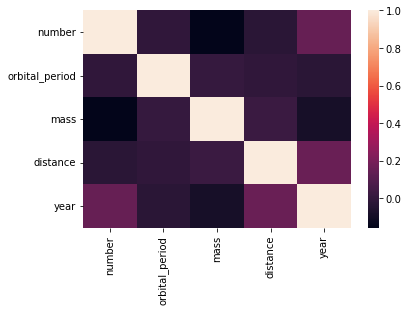

In [104]:
sns.heatmap(fixed_df.corr())

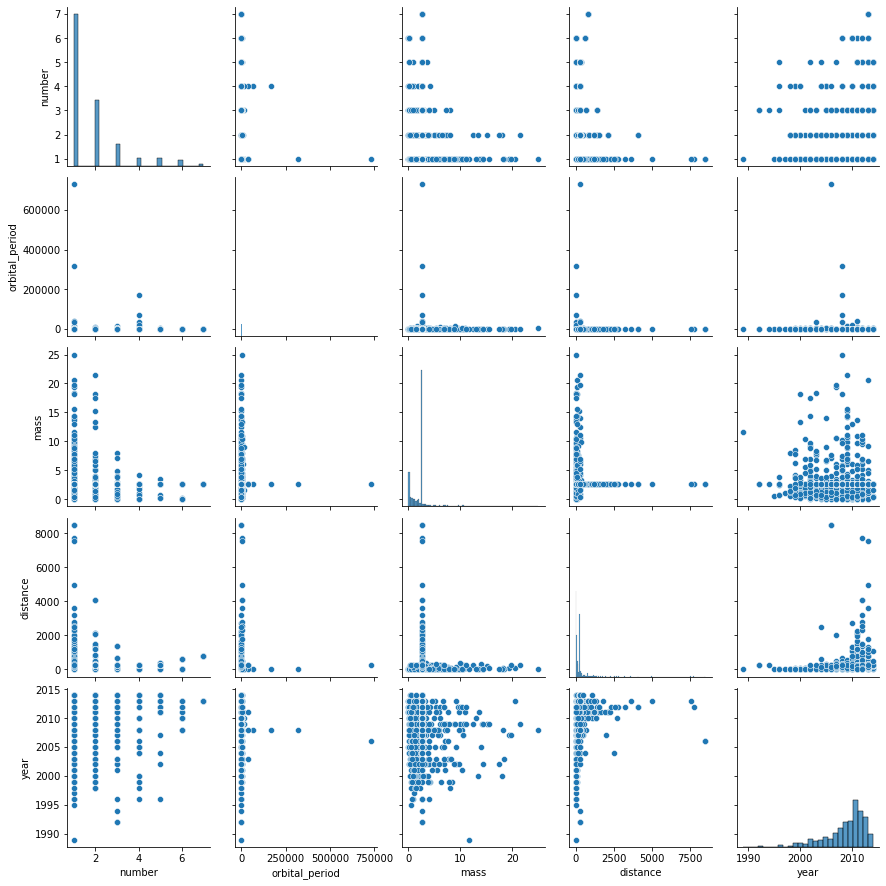

In [110]:
sns.pairplot(fixed_df)


✅**Try strategy "median" instead of "mean"**

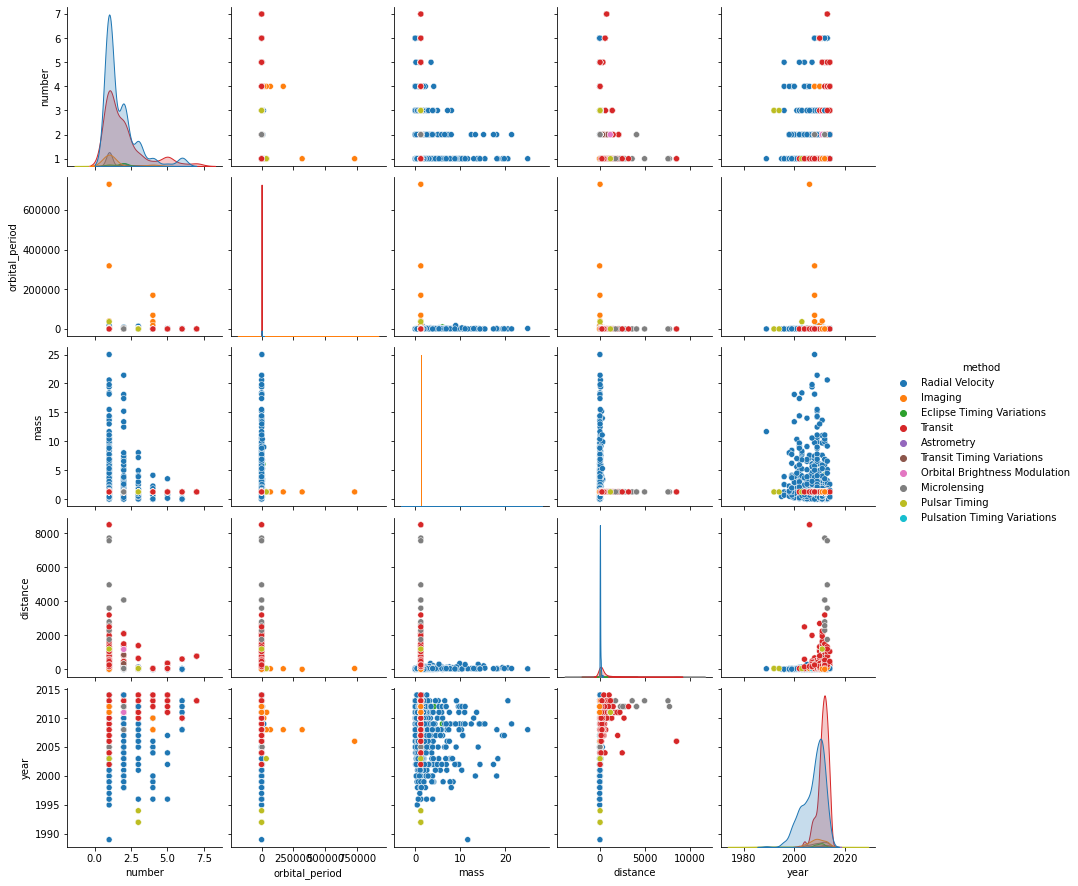

In [112]:
my_imp_2 = SimpleImputer(missing_values=np.NaN,strategy="median")
fixed_df_2 = pd.DataFrame(my_imp_2.fit_transform(df.drop(columns="method")))
fixed_df_2["method"] = df["method"]
fixed_df_2.columns = ['number', 'orbital_period', 'mass', 'distance', 'year', 'method']
fixed_df_2.index = df.index

sns.pairplot(fixed_df_2,hue = "method")

✅**Try strategy "constant" instead of "mean"**

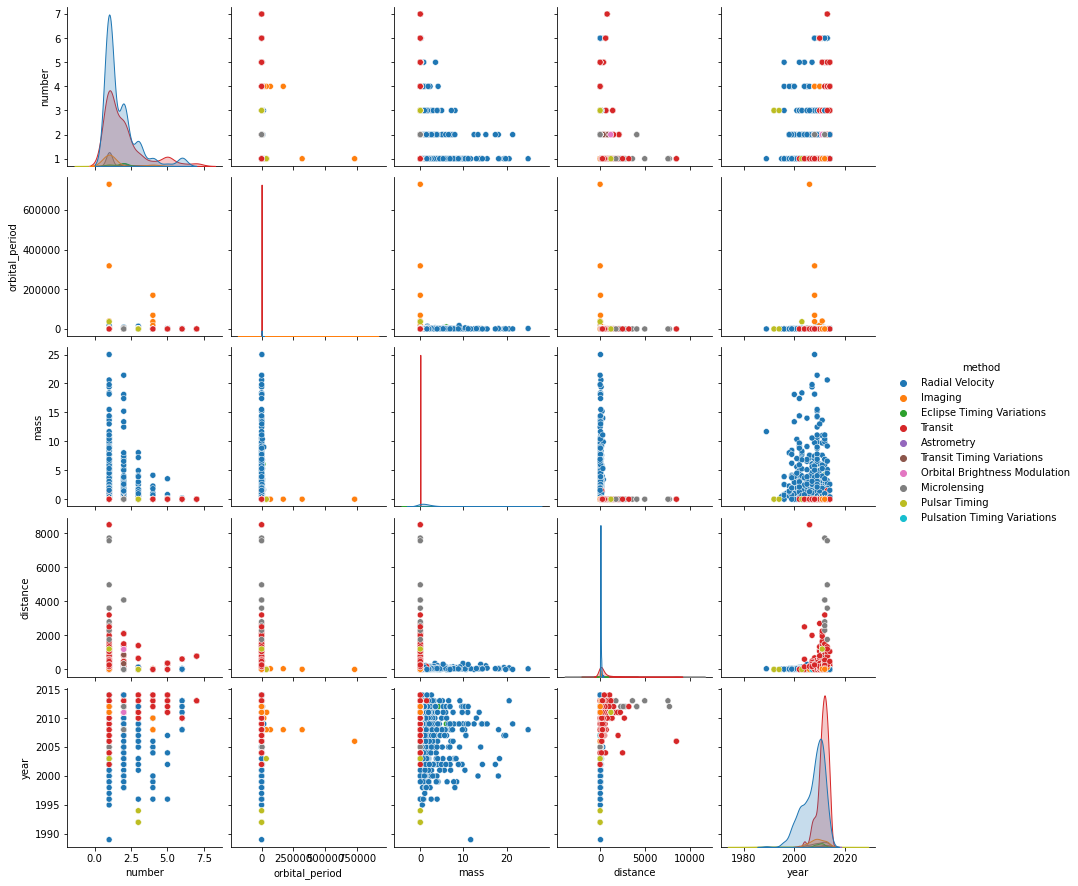

In [113]:
my_imp_3 = SimpleImputer(missing_values=np.NaN,strategy="constant")
fixed_df_3 = pd.DataFrame(my_imp_3.fit_transform(df.drop(columns="method")))
fixed_df_3["method"] = df["method"]
fixed_df_3.columns = ['number', 'orbital_period', 'mass', 'distance', 'year', 'method']
fixed_df_3.index = df.index

sns.pairplot(fixed_df_3,hue = "method")

✅Answer:

*We are able to use mean and median as well as constant as the strategy. We also corrected some mistake in the given code, where we given names to "fixed_df", the "method" name should be given to the last column instead of the first column.

____
## Fri ICA
____

In this ICA you will make six heatmaps - that's it! 

What you will do is make three fake datasets and make two heatmaps for each:
* one that shows the structure of missing data,
* another that shows correlations. 

You have already made visualizations like these in the Wed ICA, so there is nothing new here. 

The three datasets you make should have strong missingness characteristics: MCAR, MAR and MNAR. The goals are that you learn how to create data with certain missingness properties and to learn to identify it in visualizations. 

Be sure to use your whiteboards for dicussions and the screens to share your results with others in your group. 

I'll give some quick code to show the basic idea, although you are free to code this any way you wish. This is a small dataset, which is easy to type in: you might want to build something much larger using `range` or `linspace` or anything else; use whatever Python libraries you need. 




In [20]:
my_dict = {'col_1': [3, np.nan, 1, 0], 'col_2': ['a', 'b', np.nan, 'd'], 'col_3': [np.nan, 'x', np.nan, 'z']}
my_df = pd.DataFrame.from_dict(my_dict)

In [21]:
my_df

,col_1,col_2,col_3
0,3.0,a,NaN
1,NaN,b,x
2,1.0,NaN,NaN
3,0.0,d,z


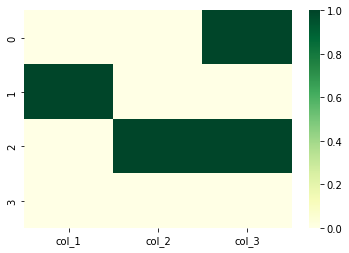

In [ ]:
sns.heatmap(my_df.isna(), cmap="YlGn")

✅**MCAR**

Values are missing without a reason.

In [56]:
my_dict_mcar = {'unit': [np.nan,2,3,4], 'price': [100, 200, np.nan, 400], 'resale_price': [50,50,200,np.nan]}
my_df_mcar = pd.DataFrame.from_dict(my_dict_mcar)
my_df_mcar

,unit,price,resale_price
0,NaN,100.0,50.0
1,2.0,200.0,50.0
2,3.0,NaN,200.0
3,4.0,400.0,NaN


✅Structure of missing data

<AxesSubplot:>

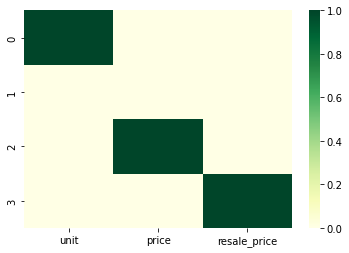

In [57]:
sns.heatmap(my_df_mcar.isna(), cmap="YlGn")

✅Correlation

<AxesSubplot:>

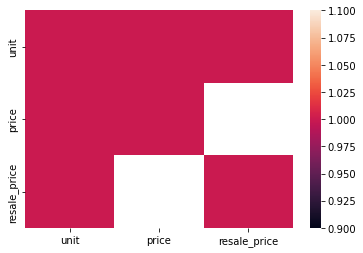

In [59]:
sns.heatmap(my_df_mcar.corr())

✅**MAR**

The data in "resale_price" is missing because "price" is missing.

In [73]:
my_dict_mar = {'unit': [1,2,3,4,5], 'price': [np.nan, 200, np.nan, 400,500], 'resale_price': [np.nan,50,np.nan,150,70]}
my_df_mar = pd.DataFrame.from_dict(my_dict_mar)
my_df_mar

,unit,price,resale_price
0,1,NaN,NaN
1,2,200.0,50.0
2,3,NaN,NaN
3,4,400.0,150.0
4,5,500.0,70.0


✅Structure of missing data

<AxesSubplot:>

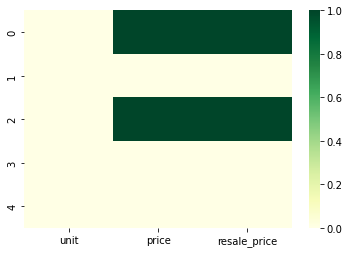

In [74]:
sns.heatmap(my_df_mar.isna(), cmap="YlGn")

✅Correlation

<AxesSubplot:>

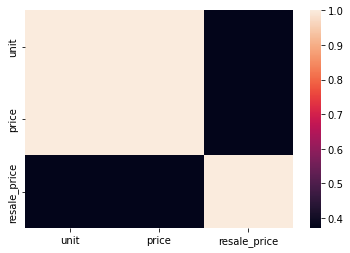

In [75]:
sns.heatmap(my_df_mar.corr())

✅**MNAR**

The unit are all missing, not because they are missing, but there are no record at all.

In [67]:
my_dict_mnar = {'unit': [np.nan,np.nan,np.nan,np.nan], 'price': [100, 200, 300, 400], 'resale_price': [50,50,200,150]}
my_df_mnar = pd.DataFrame.from_dict(my_dict_mnar)
my_df_mnar

,unit,price,resale_price
0,NaN,100,50
1,NaN,200,50
2,NaN,300,200
3,NaN,400,150


✅Structure of missing data

<AxesSubplot:>

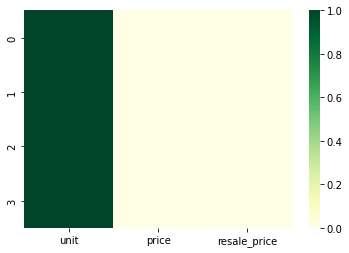

In [68]:
sns.heatmap(my_df_mnar.isna(), cmap="YlGn")

✅Correlation

<AxesSubplot:>

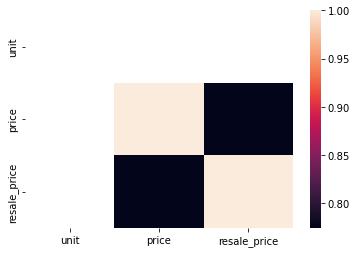

In [69]:
sns.heatmap(my_df_mnar.corr())